#  WGU MSDA D212 Data Mining II Task 3 - Association Rules and Lift Analysis

## Jan Francis Mitchell Barlaan

### A1: Proposal of Question
* My question for this analysis is what products do telecommunications customers frequently bundle together in their purchases?

### A2: Defined Goal
* Our goal is to discover what product pairs telecom customers frequently purchase so that we can optimize marketing ad campaigns and popular product and service bundles. Ultimately, this would maintain and/or boost customer satisfaction, leading to decreased churn.


### B1: Explanation of Market Basket
* Market basket analysis is a strategic data mining technique retailers use to enhance sales by understanding customer purchasing patterns. This method involves examining substantial datasets, such as historical purchase records, to unveil inherent product groupings and identify items that customers tend to buy together. By recognizing these co-occurrence patterns, retailers can make informed decisions to optimize inventory management, devise effective marketing strategies, employ cross-selling tactics, and refine store layouts for improved customer engagement (Amruta, Market basket analysis: A comprehensive guide for businesses 2024).


*  Rules in Market Basket work in an "if-then" antecendent-consequent form. For example, if a customer purchases new boots, then they are highly likely to purchase insoles and leather conditioner. 



* In application to our dataset, Market Basket Analysis will comb through each recorded transaction and calculate frequencies of items purchased as well as the antecendents/other items paired with the initial item in each specific transaction. These outcomes are known as rules, which are formed in the aforementioned if-then manner. Item pairings based on these rules are formed on metrics such as support, confidence, and lift. The company can ultimately use these resulting rules to assist them in improving and creating specific product placement and marketing strategies to further boost sales of these discovered pairs.

### B2: Transaction Example
* One example of a transaction in the provided dataset is the following purchase: 

* Cat8 Ethernet Cable; Dust-Off Compressed Gas 2 pack; TP-Link AC1750 Smart WiFi Router.




### B3: Market Basket Assumption
* One key assumption of Market Basket is Transaction Independence. It assumes that each entry in the dataset represents an independent transaction, where a member makes purchases on a specific date.

* Market Basket Analysis is dependent on making  item associations within individual transactions. Non-independent transactions have a possibility of influencing the reliability of the generated association rules in the analysis (Denira.n, Boosting sales with data: The Power of Market Basket Analysis in retail 2023).



### C1: Transforming the Data Set


 

In [1]:
# Import all necessary packages
import pandas as pd
from pandas import DataFrame
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:

# Import the csv containing customer purchase data
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D212\Task 3\Churn Dataset/teleco_market_basket.csv')

# Explore the original data
df.head(5)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [4]:
df.shape

(15002, 20)

In [5]:
# Drop blank rows from the dataset
## Retain only rows with non-null values
df = df[df['Item01'].notna()]

df.shape

(7501, 20)

In [6]:
#Half of the data contained null values/no data as seen in the reduction of rows

# Converting our data to a list of lists
## Empty list:
rows = []
## for loop ranging from 0 to 7501, corresponding with number of rows in the data set
for i in range (0,7501):
    rows.append([str(df.values[i,j])
for j in range (0,20)])

In [7]:
#Using TransactionEncoder to create a numpy Boolean array

# Instantiate the encoder
encoder = TransactionEncoder()
# Create array of fit and transformed data
array = encoder.fit(rows).transform(rows)
# Transform array into dataframe
## This dataframe will contain each item as its own column, and contain rows of boolean values as noted above
transaction = pd.DataFrame(array, columns=encoder.columns_)
transaction

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
#Each column in the total 120 columns represents an item. Each row represents an individual transaction

# Display a list of all items by displaying a list of all columns
for col in transaction.columns:
    print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [9]:
#We need to drop a column since it is empty/displaying 'nan'

Clean_MB_df = transaction.drop(['nan'], axis=1)
Clean_MB_df.shape

(7501, 119)

In [10]:
Clean_MB_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Final cleaned Market Basket dataframe that we will conduct the analysis on contains 7,501 rows/transactions and 119 columns/items

#Export cleaned Market Basket dataframe to csv
Clean_MB_df.to_csv('Clean_MB_df.csv', index=False)

### C2: Code Execution

In [12]:
Clean_MB_df.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'hP 65 Tri-color ink', 'iFixit Pro Tech Toolkit', 'iPhone 11 case',
       'iPhone 12 Charger cable', 'iPhone 12 Pro case', 'iPhone 12 case',
       'iPhone Charger Cable Anker 6ft', 'iPhone SE case',
       'nonda USB C to USB Adapter', 'seenda Wireless mouse'],
      dtype='object', length=119)

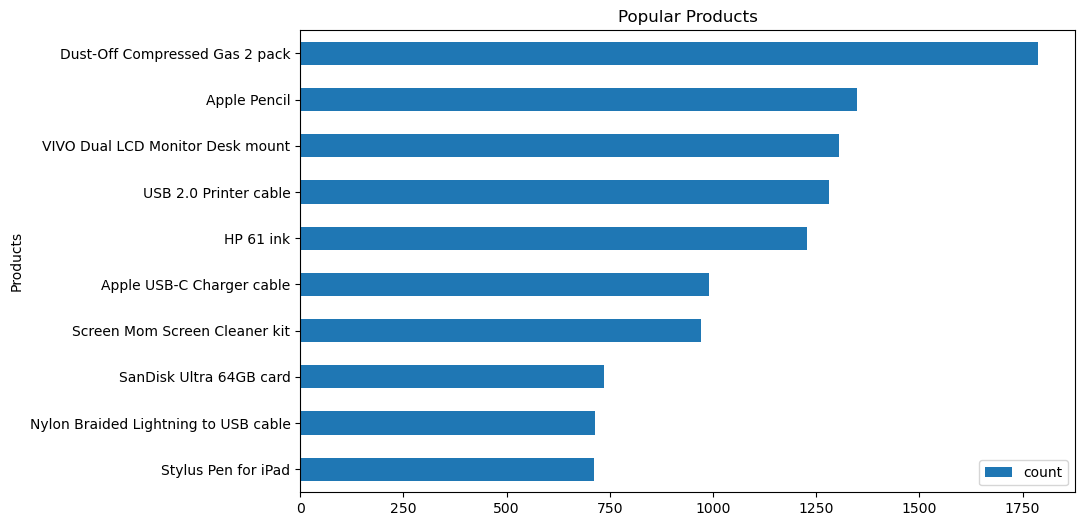

In [13]:

# Ten most popular products in the transformed dataset

count = Clean_MB_df.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Products',0:'count'})

#Data visualization of most popular items 
plt.rcParams['figure.figsize'] = (10,6)
ax = pop_item.plot.barh(x = 'Products', y = 'count')
plt.title('Popular Products')
plt.gca().invert_yaxis()

In [14]:
#Create Apriori object called rules
rules = apriori(Clean_MB_df, min_support = 0.02, use_colnames = True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(Screen Mom Screen Cleaner kit, USB 2.0 Printe..."
99,0.035462,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ..."
100,0.020131,"(Stylus Pen for iPad, USB 2.0 Printer cable)"
101,0.025197,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen ..."


### C3: Association Rules Table

In [15]:
# Create rules table with lift > 1 filtering on the top 3 values
rules_table = association_rules(rules, metric = 'lift', min_threshold = 1)
rules_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,1.0,0.011020,1.051182,0.627330,0.086760,0.048690,0.276610
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,1.0,0.008095,1.037830,0.435627,0.086402,0.036451,0.229537
4,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,1.0,0.009023,1.058905,0.521973,0.094465,0.055628,0.213129
5,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,1.0,0.009023,1.190117,0.462740,0.094465,0.159746,0.213129
6,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
7,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
8,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
9,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,1.0,0.003614,1.016889,0.194486,0.081009,0.016609,0.191083


In [16]:
#Rules sorting by confidence metric and showing top 3 values
top_three_rules = rules_table.sort_values('confidence', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
36,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
52,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127


In [17]:
#Rules sorting by lift metric and showing top 3 values
top_three_rules = rules_table.sort_values('lift', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
84,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
65,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939


In [18]:
#Rules sorting by support metric and showing top 3 values
top_three_rules = rules_table.sort_values('support', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
62,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
63,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
41,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158


### C4: Top Three Rules

* Displayed below are the top three rules in the associated rules table. There is no set industry standard, however, a common practice is to consider rules with a support value above 0.05, a confidence above 0.5, and a lift value greater than 1 as potentially interesting and actionable. Despite these common practice values, specific business needs can dictate different thresholds for these metrics. 


* For our purposes, we will set the threshold for lift values above 1.9 and moderate values of 0.3 for confidence and 0.02 for support, respectively.

In [19]:
#Top 3 sorted rules by the multiple metrics listed above

sorted_rules = rules_table[(rules_table['lift'] > 1.9) & (rules_table['confidence'] > 0.30) & (rules_table['support'] > 0.02)].sort_values(by=['lift'], ascending= False)
top_three_rules

sorted_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
65,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610


* Higher lift values indicate the ratio of the consequent pair appearing in the transaction with the antecedent. Lift basically determines the dependence of item B, the consequent being purchased if item A, the antecedent is purchased. As we can see, our top 3 rules have very high lift ratios ranging from 1.9 to nearly 2.3. 

* We set a moderate confidence value to display values greater than 0.3. This metric represents the probability of the antecedent item A being purchased if consequent B is purchased. All of our top 3 rules display probabilities above 30% of item A being purchased if item B is purchased. I initially attempted to set a higher confidence value above 0.5, however, no transactions fit this criteria in our provided dataset, prompting me to lower it to a moderate value of 0.3. 

* Similarly, I attempted to set a higher threshold for support values greater than 0.05, however, no transactions fit this criteria, prompting me to lower it to values greater than 0.02. Support represents the proportion of transactions in the overall data set that contain that particular item. For example, in our very top rule, 9.8% of our transactions feature the SanDisk Ultra 64GB card as the antecedent while the VIVO Dual LCD Monitor Desk mount represents 17.4% of transaction consequents. In the frame of overall transactions, this particular antecedent/consequent item pair represents 3.9% of overall transaction pairs in the dataset. 

### D1: Significance of Support, Lift, and Confidence Summary
* Support represents the frequency in which an item is purchased. According to our Association Rules Table specifically sorted by Support, the VIVO Dual LCD Monitor Desk mount and the Dust-Off Compressed Gas 2 pack appear to be the most frequently purchased items.


* Confidence represents the conditional probability of an item being bought given another item is bought. This metric focuses on the reliability of the association rule. High values of confidence indicate that if one item is purchased, the other item is very likely to be purchased as well. 

* Lift indicates how much more likely two items are to be bought together compared to if their purchases were completely independent. This metric measures the strength of the association between two items compared to what would be expected by chance. It takes into account the individual popularity of each item. Lift values > 1 indicate that the two items are more likely to be purchased together than expected (IUYasik, Market basket analysis &amp; apriori algorithm using Zhang's metric 2023). 

### D2: Practical Significance of Findings
* Our goal in conducting this analysis was to discover which specific items are purchased together more frequently by our customers. According to the results of our analysis as indicated by our top 3 sorted rules by the multiple metrics of support, lift, and confidence set to our custom thresholds, the SanDisk Ultra 64GB card, FEIYOLD Blue light Blocking Glasses, and 10ft iPHone Charger Cable 2 Pack display the highest frequency of being purchased in tandem by our customers. 


* We need to keep in mind that these items are the antecedents of our top 3 rules. Their matching consequent items are the VIVO Dual LCD Monitor Desk mount, which appears in the first two rules of the top 3 rules, and the Dust-Off Compressed Gas 2 pack, which appears in the third of the top 3 rules, respectively.

* Upon further observation of our top three rules results for lift and confidence, shows that the SanDisk Ultra 64GB card and the FEIYOLD Blue light Blocking Glasses are frequently purchased. The fact that these two items appear in both top three rules results sorting methods for lift and confidence as the top 2nd and top 3rd item, signifies a strong probability of these two items being present in  purchase transactions.

### D3: Course of Action
* In an effort to further maximize the significance of our findings, better product placement and/or discounts can be offered to increase the visibility on our frequently purchased items. This can involve placing items in very close proximity to one another and also possibly offering bundle deals if one item is purchased alongside the other. Increasing item visibility can also be done by strategically placing the items at checkout and/or at the entrance of the store. In the case of online shopping, promo banners and emails can be designed to increase interest in purchasing these products.

### E and E1: Panopto Video of Code and Panopto Video of Programs
* My Panopto submission containing the code and programs used can be found at the following link: 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=da79bd08-c7eb-4a7c-82f7-b29c00233eab

### F: Sources for Third-Party Code
* [Kesselly Kamara]. Data Mining II - D212 Task 3 [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=db85c4f1-0da5-4bde-a1a4-b07c0019d46d

### G: Sources
* Amruta. (2024, December 1). Market basket analysis: A comprehensive guide for businesses. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/ 
* Deniran, O. H. (2023, November 27). Boosting sales with data: The Power of Market Basket Analysis in retail. Medium. https://medium.com/@chemistry8526/boosting-sales-with-data-the-power-of-market-basket-analysis-in-retail-c79cc10a14df 
* IUYasik. (2023, October 4). Market basket analysis & apriori algorithm using Zhang’s metric. Medium. https://medium.com/@iuyasik/market-basket-analysis-apriori-algorithm-using-zhangs-metric-708406fc5dfc#:~:text=Confidence%20and%20lift%20are%20two,Lift 